### Lineare Regression auf dem Ames Housing Price Data Set 

Einmalige Installation notwendiger Pakete wird in VL 3 beschrieben. Verwendet werden hier die Bibliotheken pandas, numpy, matplotlib, seaborn, sklearn, imblearn. Bitte einmalig installieren.

##### Versionsgeschichte

    1.0 05.05.2023 Willi Hahn Initialversion
          Datenvorbereitung nach https://www.eamonfleming.com/projects/housing-regression.html
    1.1 05.06.2023 Willi Hahn Bokeh Plot Truth vs Prediction angefügt
    1.2 16.06.2023 Willi Hahn interactive Bokeh Plots
    1.2 23.10.2023 Willi Hahn Datenvorbereitung neu strukturiert. 
                         Eingabedaten werden nun in Ames EDA handcrafted.ipynb erstellt.
   


In [1]:
# notwendige Bibliotheken importieren und konfigurieren
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
_ = pd.set_option('display.max_columns', None) # damit mehr als 20 Spalten angezeigt werden.
pd.set_option('display.min_rows', 8) # damit nicht nur 10 Zeilen mit  ... dazwischen ausgegeben werden
pd.set_option('display.max_rows', 500) # damit nicht nur 10 Zeilen mit  ... dazwischen ausgegeben werden
import numpy as np
from collections import Counter
from timeit import default_timer as timer
from math import ceil
from itertools import zip_longest
import matplotlib.pyplot as plt #Plot Bibliothek
import seaborn as sns #importing Seaborn (enhancement of Mathplotlib) for plots
from sklearn import metrics as met 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
import bokeh   # graphische, interaktive Plots
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, factor_mark
from bokeh.palettes import Category10
from bokeh.models import HoverTool, PanTool, ZoomInTool, ZoomOutTool, SaveTool, WheelZoomTool, BoxZoomTool, ResetTool
from bokeh.models import  Legend, LegendItem
from bokeh.io import output_notebook, show
_ = output_notebook(resources=None, verbose=True, hide_banner=True)

scriptname='Ames LM V1.3.ipynb'
logtext=""
import logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logging.basicConfig(
    force=True,
    level=logging.INFO,
    format="%(asctime)s;%(levelname)s;%(message)s;",
    datefmt="%Y-%m-%d %H:%M:%S",
    encoding='utf-8',
    filemode='a',
    filename="AllScripts.log" # Default ist append
)
logger = logging.getLogger()


In [2]:
# Daten einlesen
path = 'c:/myBox/Projekte/FHDW/Kurs DAML/python/Ames_Train_1_cleaned.csv' # für lokale Dateien
#path = 'https://github.com/WilliHahn/FHDW/raw/main/Ames_Train_1_cleaned.csv' # für Colab

df = pd.read_csv(path, sep=',') 
df_org = df.copy() # Eine Datenkopie als Referenz behalten

#Erstuntersuchung mit den Standardbefehlen aus Pandas zur Ansicht von data frames
df.info(verbose=True, show_counts=True)
print (df.describe())
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SalePrice             2930 non-null   int64  
 1   Lot Area              2930 non-null   int64  
 2   HouseAge              2930 non-null   int64  
 3   Overall Qual          2930 non-null   int64  
 4   Gr Liv Area           2930 non-null   int64  
 5   Kitchen Qual          2930 non-null   int64  
 6   Garage Area           2930 non-null   float64
 7   Total Bsmt SF         2930 non-null   float64
 8   Bsmt Qual             2930 non-null   float64
 9   Garage Type_2Types    2930 non-null   int64  
 10  Garage Type_Attchd    2930 non-null   int64  
 11  Garage Type_Basment   2930 non-null   int64  
 12  Garage Type_BuiltIn   2930 non-null   int64  
 13  Garage Type_CarPort   2930 non-null   int64  
 14  Garage Type_Detchd    2930 non-null   int64  
 15  Neighborhood_Blmngtn 

,SalePrice,Lot Area,HouseAge,Overall Qual,Gr Liv Area,Kitchen Qual,Garage Area,Total Bsmt SF,Bsmt Qual,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,215000,31770,50,6,1656,0,528.0,0.0,2.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,105000,11622,49,5,896,0,730.0,144.0,2.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,172000,14267,52,6,1329,1,312.0,0.0,2.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,244000,11160,42,7,2110,4,522.0,0.0,2.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,189900,13830,13,5,1629,0,482.0,0.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,195500,9978,12,6,1604,1,470.0,0.0,2.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,213500,4920,9,8,1338,1,582.0,0.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,191500,5005,18,8,1280,1,506.0,0.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,236500,5389,15,8,1616,1,608.0,0.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,189000,7500,11,7,1804,1,442.0,0.0,2.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Trainings- und Testdaten aufteilen

TESTANTEIL = 0.25 # Split der Test- und Trainingsdaten
# Trennung von unabhängigen Variablen und abhängiger Zielvariable
y = df['SalePrice']
x = df.drop(['SalePrice'], axis = 1)
#x.head().T
#y.head().T
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TESTANTEIL, random_state=4711)
dfx_test = pd.DataFrame(data=x_test, columns=x.columns) # vor Skalierung mit Oringinalwerten
# und prüfen durch ansehen
#print (x_train.shape)
#print (y_train.shape)
#print (x_test.shape)
#print (y_test.shape)



In [5]:
# Datenvorbereitung : Variablen skalieren
SCALER = StandardScaler()
#SCALER = MinMaxScaler()
x_train_unscaled = x_train
y_train_unscaled = y_train
x_test_unscaled = x_test
y_test_unscaled = y_test

x_train = SCALER.fit_transform(x_train_unscaled)
x_test = SCALER.transform(x_test_unscaled)
#
x_test.T

array([[-0.31053847, -0.1099925 ,  0.7108094 , ..., -0.31731911,
         0.4496974 , -0.49154701],
       [-0.94360211, -0.7454885 , -1.20775359, ..., -1.17473465,
        -0.25020447,  1.07055293],
       [-0.07823284, -0.7884707 ,  2.05248071, ...,  0.63200501,
         0.63200501, -2.91918425],
       ...,
       [-0.13443321, -0.13443321, -0.13443321, ..., -0.13443321,
        -0.13443321, -0.13443321],
       [-0.16466777, -0.16466777, -0.16466777, ..., -0.16466777,
        -0.16466777, -0.16466777],
       [-0.0958486 , -0.0958486 , -0.0958486 , ..., -0.0958486 ,
        -0.0958486 , -0.0958486 ]])

In [6]:
# Lineare Regression berechnen
t0 = timer()

regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

# unscaled regression for use of 1 unit change interpretation
regressor_unscaled = LinearRegression()
regressor_unscaled.fit(x_train_unscaled, y_train_unscaled)
y_pred_unscaled = regressor_unscaled.predict(x_test_unscaled)


t1 = timer()
print ('Laufzeit Vorhersage = ', round(t1 - t0, 0), ' sec')

# COMPARING TEST DATA AND PREDICTED DATA
df_comparison = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print('Actual test data vs predicted: \n', df_comparison)

# EVALUATING MODEL METRICS
mae = mean_absolute_error(y_test, y_pred)
print("MAE =", mae)
mse = mean_squared_error(y_test,y_pred)
print("MSE",mse)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE",rmse)
r2 = r2_score(y_test,y_pred)
print('Model Score R2: ', r2)
adjusted_r2 = 1 - (1-r2)*(len(y_pred)-1)/(len(y_pred)-x_test.shape[1]-1)
print('Model Score R2 Adjusted: ', adjusted_r2)
#print('\n\nCoefficients: ', regressor.coef_)
#print('Intercept: ',regressor.intercept_)

logging.info(scriptname + ';' + "Ames_Train_1_cleaned.csv, Standard scaled"+ ";")
logging.info(scriptname + ';' + f'{mae:9.0f}' + ";" + f'{rmse:9.0f}'+ ";" + f'{r2:9.4f}'+ ";"+ 
             f'{adjusted_r2:9.4f}'+ ";")



LinearRegression()

LinearRegression()

Laufzeit Vorhersage =  0.0  sec
Actual test data vs predicted: 
       Actual      Predicted
1625  204000  206325.566138
1433  145000  141867.566138
2379  412083  393012.566138
2501  310000  338684.566138
...      ...            ...
2132  226000  208183.566138
1809  181000  197878.566138
377   187500  189933.566138
708    45000    6407.566138

[733 rows x 2 columns]
MAE = 19546.48712431828
MSE 851526924.5393816
RMSE 29180.93426433399
Model Score R2:  0.8594478267911119
Model Score R2 Adjusted:  0.8508924771175274


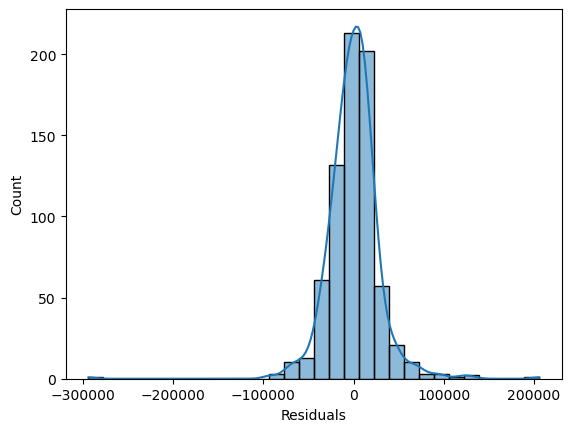

In [7]:
# Sind die die Residuen zwischen wirklichen und vorhergesagten Verkaufspreisen normalverteilt?
residuals = y_test - y_pred
_ = sns.histplot(residuals, bins=30, kde=True)
_ = plt.xlabel('Residuals')
#plt.scatter(y=residuals, x=data['x'])
#plt.ylabel('Residuals')
#plt.xlabel('Independent variable x')
plt.show()

In [17]:
# Regressionskoeffizienten und 1-unit change
#regressor_unscaled.coef_.dtype
#regressor_unscaled.coef_.size
np.printoptions(suppress=True, formatter={'float_kind':'{:0.2f}'.format})

#regressor_unscaled.coef_.size
unscaled_coef = regressor_unscaled.coef_
print('\n\nCoefficients: ', regressor_unscaled.coef_)
print('Intercept: ',regressor_unscaled.intercept_)
coef_effect = [(i - 1)*df.SalePrice.mean() for i in unscaled_coef]

#var_impact = pd.DataFrame(data=[x.columns, coef_effect]).T
var_impact = pd.DataFrame(data=[x.columns, unscaled_coef]).T
var_impact.columns = ["variable", "1-unit change"]
var_impact



Coefficients:  [ 7.68092463e-01 -2.56171142e+02  1.30099240e+04  4.55074187e+01
  1.30219562e+04  4.98494302e+01  6.11236074e+00  1.30434912e+04
 -3.09469071e+04 -7.83050791e+03 -2.23229665e+04 -1.20236888e+04
 -2.00903500e+04 -1.48869683e+04 -8.40880887e+03 -2.65517560e+04
 -2.45476211e+04  1.27907768e+03  9.41746762e+02 -8.85189536e+03
  2.38169057e+04 -1.05015810e+04 -1.47581857e+04 -5.79167134e+03
  1.02846614e+05 -1.15558718e+04 -2.83050563e+04 -2.50217127e+04
 -8.80862781e+03 -4.35887621e+03 -2.33093092e+04 -1.15028003e+04
  4.87495953e+04  2.83070552e+04 -1.41772589e+04 -1.22289492e+04
 -3.15274856e+03 -1.81943863e+04 -3.11006648e+03  4.32432978e+04
  7.31760163e+03  6.63528961e+03]
Intercept:  -20639.03540395075


,variable,1-unit change
0,Lot Area,0.768092
1,HouseAge,-256.171142
2,Overall Qual,13009.924049
3,Gr Liv Area,45.507419
4,Kitchen Qual,13021.956192
5,Garage Area,49.84943
6,Total Bsmt SF,6.112361
7,Bsmt Qual,13043.491231
8,Garage Type_2Types,-30946.907094
9,Garage Type_Attchd,-7830.507909
